In [2]:
%reset -f

# 🌟 Operation NeuroNexus: Outsmarting SkyNet

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. As the last line of defense against total machine domination, you and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course. Your objective: outsmart the AI at its own game.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model. In this battle of human vs. AI, performance is key.
4. After completing each task, you should answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet's central core has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike and temporarily disable its defenses.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:
   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.   
   b. Analyze prediction error distribution. What is an unbiased estimator?
   * An unbiased estimator has a sum of prediction error that tends to zero, meaning that it predicts as much above and below the true value.


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

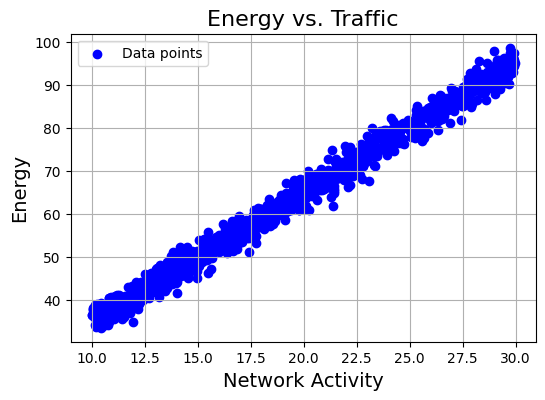

In [6]:
# Data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

In [7]:
lr = LinearRegression()

lr.fit(data['Net_Activity'], data['Energy'])

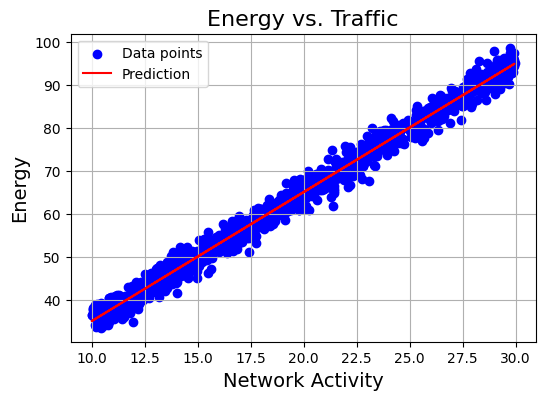

In [8]:
data = pd.read_csv('mission1.csv')
energy = lr.predict(data['Net_Activity'])

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.plot(data['Net_Activity'], energy, c='red', label='Prediction')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

Sum of residuals: 0.10830229522442636


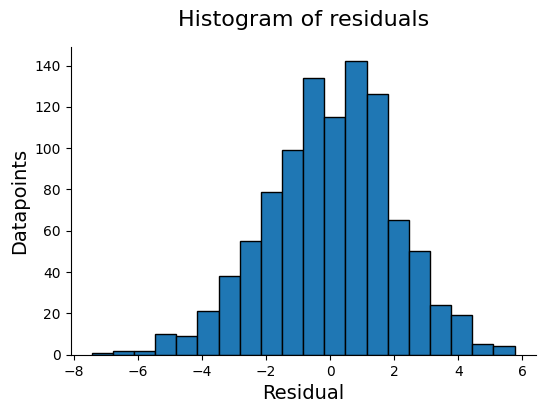

In [9]:
# 1.2b
residuals = data['Energy'] - energy
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins='rice', edgecolor='black')
plt.grid(False)
for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)
plt.xlabel('Residual', fontsize=14)
plt.ylabel('Datapoints', fontsize=14)
plt.title('Histogram of residuals', fontsize=16, pad=15)
print(f'Sum of residuals: {np.sum(residuals)}')
plt.show()
# The plot shows that the estimator has some positive bias, as the sum of the residuals is above 0. It is however pretty normalized.


## 🧠 Mission 2: Decoding SkyNet's Neural Encryption

### 🌐 The Discovery
SkyNet has evolved, using a "Synapse Cipher" that mimics human neural patterns. We've intercepted two types of neural signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden neural connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

### Discussion

#### 3.

a. The model seemingly did not take the "sammenheng" between the features into account. Therefore I engineered two features, product and difference, that emphasized the "sammenheng" between the original features. <br><br> 
b. Logistic regression only handles additive effect of the features. This is important because the features here are multiplicative. <br><br> 
c. Yes, the decision tree classifier can solve the problem. This is because it has more freedom to fit to the data, and can find the correlation between the data and the targets. <br><br> 


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']
from logistic_regression import LogisticRegression

engineered_features = True

In [27]:
X_train = train.drop(columns=['y', 'split']).values
Y_train = train['y'].values
X_train = X_train.T

# Engineered features, product and difference of original features 
if engineered_features:
    X_prod = (X_train[0]*X_train[1]).reshape(1,-1)
    X_train = np.append(X_train, X_prod, 0)
Y_train = Y_train.reshape(1, X_train.shape[1])



print(f'''
The shape of X_train: {X_train.shape}
The shape of Y_train: {Y_train.shape}
''')




The shape of X_train: (3, 500)
The shape of Y_train: (1, 500)



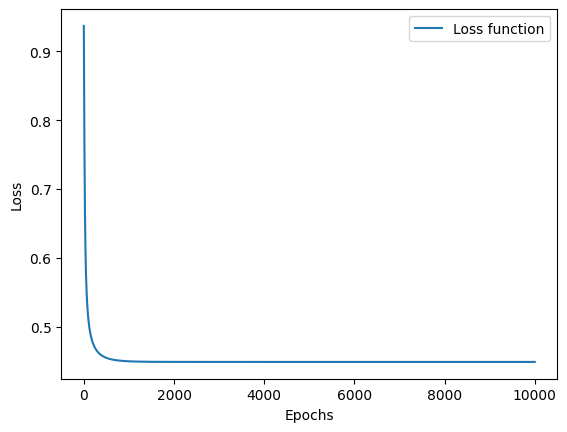

In [28]:
lr = LogisticRegression(learning_rate=0.1, epochs=10000)
cost_list = lr.fit(X_train, Y_train)

plt.plot(np.arange(len(cost_list)), cost_list, label='Loss function')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

The accuracy is 0.902

The shape of Y_pred: (500, 1)
The shape of Y_test: (500, 1)

ROC-AUC: 0.9028100418141912
Precision: 0.8779527559055118
Recall: 0.9253112033195021
F1 Score: 0.901010101010101

Accuracy: 0.902


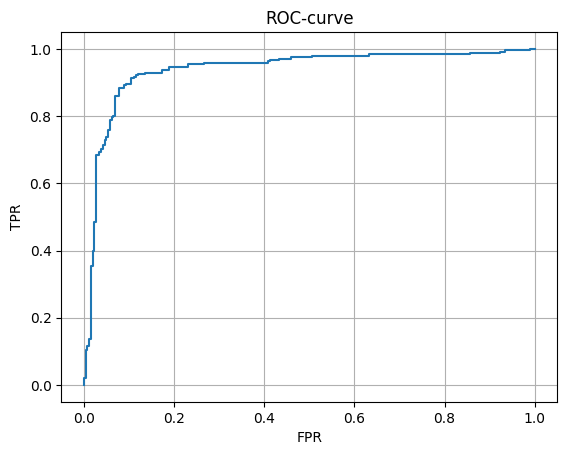

In [29]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, roc_curve

X_test = test.drop(columns=['y', 'split']).values.T
if engineered_features:
    X_test_prod = (X_test[0]*X_test[1]).reshape(1,-1)
    X_test = np.append(X_test, X_test_prod, 0)
    
Y_test = test['y'].values
Y_test = Y_test.reshape(-1,1)
Y_pred = lr.predict(X_test).T
lr.accuracy(X_test, Y_test)

print(f'''
The shape of Y_pred: {Y_pred.shape}
The shape of Y_test: {Y_test.shape}
''')

print("ROC-AUC:", roc_auc_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("\nAccuracy:", accuracy_score(Y_test, Y_pred))


Y_pred_prob = lr.predict_proba(X_test).T
roc = roc_curve(Y_test, Y_pred_prob)
plt.plot(roc[0], roc[1])
plt.title('ROC-curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(True)
plt.show()


In [30]:
X_test = test.drop(columns=['y', 'split']).values.T
Y_test = test['y'].values.T
Y_test =  Y_test.reshape(1, X_train.shape[1])
X_train = train.drop(columns=['y', 'split']).values
Y_train = train['y'].values
X_train = X_train.T


In [31]:
# Desicion tree classifier
from sklearn import tree

dtc = tree.DecisionTreeClassifier(max_depth=4)

dtc.fit(X_train.T, Y_train.T)

Y_pred_proba = dtc.predict_proba(X_test.T)[:,1]
Y_test = Y_test.T
Y_pred = dtc.predict(X_test.T)


print("ROC-AUC:", roc_auc_score(Y_test, Y_pred_proba))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("\nAccuracy:", accuracy_score(Y_test, Y_pred))

# tree.plot_tree(dtc)
# plt.show()

ROC-AUC: 0.9181258911549368
Precision: 0.9437229437229437
Recall: 0.9045643153526971
F1 Score: 0.923728813559322

Accuracy: 0.928


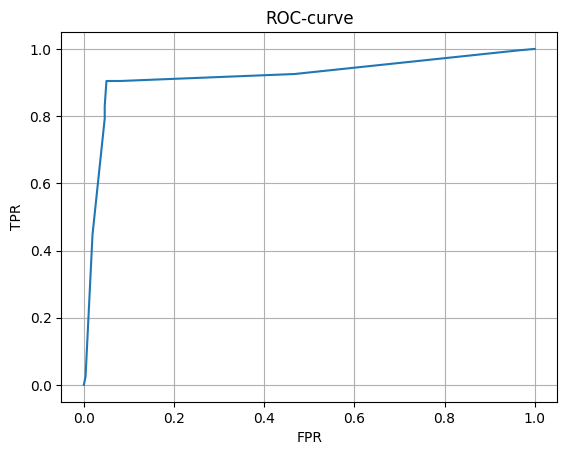

In [32]:
# Plot roc curve
from sklearn.metrics import roc_curve
Y_pred_prob = dtc.predict_proba(X_test.T)[:,1]
roc = roc_curve(Y_test, Y_pred_prob)
plt.plot(roc[0], roc[1])
plt.title('ROC-curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(True)
plt.show()


## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use quantum entanglement encryption. We need a rapid response system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`.

> "Every misclassification risks losing a sector of the city to machine control."

### 🧠 The Challenge
1. **Rarity**: Critical communications are only 20% of the data stream
2. **Quantum Complexity**: Encryption information is hidden in quantum states

### 🚀 Your Tools
- Intercepted AI communications dataset
- Quantum signature analysis skills
- Decision tree algorithm

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import random

random.seed()
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

X_train = train.drop(columns='target').values.T
X_train[3] = (X_train[3]*1000)%2
X_train = X_train.T
y_train = train['target'].values

X_test = test.drop(columns='target').values.T
X_test[3] = (X_test[3]*1000)%2
X_test = X_test.T
Y_test = test['target'].values

In [34]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [126]:
from sklearn import tree
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
dtc = tree.DecisionTreeClassifier(criterion='log_loss', 
                                  max_depth=8, 
                                  min_samples_leaf=30, 
                                  min_samples_split=80, 
                                  #random_state=12,
                                  max_leaf_nodes=22)
dtc.fit(X_train, y_train)
print(dtc.feature_importances_)
cv_scores = cross_val_score(dtc, X_train, y_train, cv=10, scoring='roc_auc')
print(cv_scores)
print("Cross-validated ROC AUC:", np.mean(cv_scores))

[0.16852665 0.         0.01275154 0.38772212 0.         0.
 0.17472007 0.25627962 0.         0.         0.        ]
[0.71369842 0.71648912 0.69593603 0.66101082 0.74213944 0.69587069
 0.66829339 0.69896164 0.72221664 0.74285312]
Cross-validated ROC AUC: 0.7057469320840324


In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2)

param_grid = {
    'max_depth': [5, 6, 7],
    'min_samples_split': [30, 50, 70, 100],
    'min_samples_leaf': [16, 18, 20],
    'criterion': ['log_loss', 'entropy']
}

grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_dtree = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred = best_dtree.predict(X_validate)
y_pred_proba = best_dtree.predict_proba(X_validate)[:,1]
mse = mean_squared_error(y_validate, y_pred)
rmse = mse ** 0.5
roc_auc = roc_auc_score(y_validate, y_pred_proba)
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"Test RMSE: {rmse}")
print(f'Test ROC-AUC: {roc_auc}')



Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=16, min_samples_split=30; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=16, min_samples_split=30; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=16, min_samples_split=30; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=16, min_samples_split=30; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=16, min_samples_split=30; total time=   0.1s
[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=16, min_samples_split=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=16, min_samples_split=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=16, min_samples_split=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=16, min_samples_split=50; total time=   0.1s
[C

In [127]:
Y_pred = dtc.predict(X_test)
Y_pred_prob = dtc.predict_proba(X_test)[:,1]

print("ROC-AUC:", roc_auc_score(Y_test, Y_pred_prob))
print("\nPrecision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))

ROC-AUC: 0.7203059691430553

Precision: 0.47297297297297297
Recall: 0.09067357512953368
F1 Score: 0.15217391304347827
Accuracy: 0.805


## 2a:


In [38]:
# import seaborn
# seaborn.pairplot(train, hue='target', diag_kind='kde')

## 2b: ROC

ROC_AUC is used because it gives a nuber which corresponds to both true positive rate and false positive. This means that if one class is overrepresented, this class is given more importance in the testing. For example, say you have a really rare event. If you use accuracy, then just guessing 'no' every time would give a high accuracy. If you use ROC_AUC, then the rare event will "matter more".

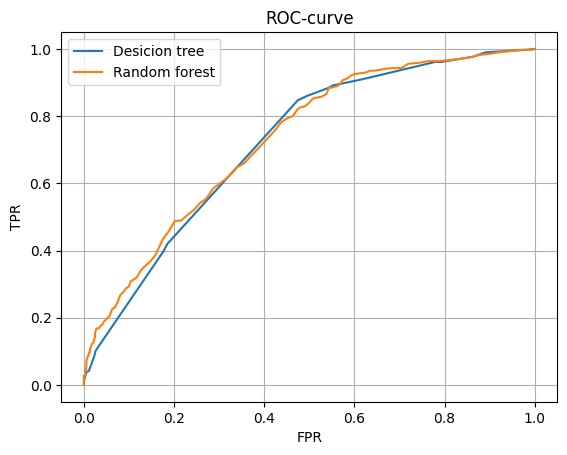

In [131]:
Y_pred_prob_dtc = dtc.predict_proba(X_test)[:,1]
roc_dtc = roc_curve(Y_test, Y_pred_prob_dtc)

Y_pred_prob_rfc = rfc.predict_proba(X_test)[:,1]
roc_rfc = roc_curve(Y_test, Y_pred_prob_rfc)

plt.plot(roc_dtc[0], roc_dtc[1], label='Desicion tree')
plt.plot(roc_rfc[0], roc_rfc[1], label='Random forest')
plt.title('ROC-curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid(True)
plt.show()

## 2c: Random forest classifier

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

X_train = train.drop(columns='target').values.T
X_train[3] = (X_train[3]*1000)%2
X_train = X_train.T
y_train = train['target'].values

X_test = test.drop(columns='target').values.T
X_test[3] = (X_test[3]*1000)%2
X_test = X_test.T
y_test = test['target'].values

rfc = RandomForestClassifier(n_estimators=200, criterion='log_loss')

rfc.fit(X_train, y_train)

cv_scores = cross_val_score(rfc, X_train, y_train, cv=5, scoring='roc_auc')
print(cv_scores)
print("Cross-validated ROC AUC:", np.mean(cv_scores))

Y_pred_prob = rfc.predict_proba(X_test)[:,1]

print("ROC-AUC:", roc_auc_score(Y_test, Y_pred_prob))

[0.7327841  0.66756785 0.75334978 0.69866134 0.7413177 ]
Cross-validated ROC AUC: 0.7187361555787973
ROC-AUC: 0.7297200339002639



## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the "Nexus Rating" of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [4]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

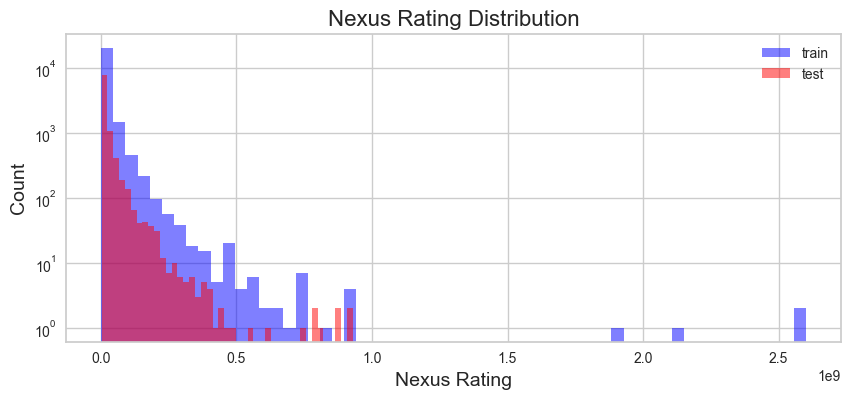

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins='rice', ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon', log=True)
test['nexus_rating'].hist(bins='rice', ax=ax, color='red', alpha=0.5, label='Train Target Distributuon', log=True)
ax.set_title('Nexus Rating Distribution', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend(['train', 'test'])
plt.show()

## Fixing test dataset
From the data, it looks like the last column in test dataset should be pushed onto the start of the set from index 1. Fixed this and saved dataset as modified dataset. 

In [5]:
# Fixing test dataset
modified_test = test.rename(columns={
                    "nexus_rating":"energy_footprint",
                    "energy_footprint":"core_reactor_size",
                    "core_reactor_size":"harvesting_space",
                    "harvesting_space":"vertical_alignment",
                    "vertical_alignment":"power_chambers",
                    "power_chambers":"energy_flow_design",
                    "energy_flow_design":"upper_collector_height",
                    "upper_collector_height":"shared_conversion_units",
                    "shared_conversion_units":"isolated_conversion_units",
                    "isolated_conversion_units":"internal_collectors",
                    "internal_collectors":"external_collectors",
                    "external_collectors":"ambient_harvesters",
                    "ambient_harvesters":"shielded_harvesters",
                    "shielded_harvesters":"efficiency_grade",
                    "efficiency_grade":"grid_connections",
                    "grid_connections":"nexus_rating"})


new_column_order = [
    'ownership_type', 'nexus_rating', 'energy_footprint', 'core_reactor_size', 'harvesting_space', 
    'vertical_alignment', 'power_chambers', 'energy_flow_design', 
    'upper_collector_height', 'shared_conversion_units', 'isolated_conversion_units', 
    'internal_collectors', 'external_collectors', 'ambient_harvesters', 
    'shielded_harvesters', 'efficiency_grade', 'grid_connections'
]
# Reorder the columns
modified_test = modified_test[new_column_order]

modified_test.to_csv('final_mission_mod_dataset.csv', index=False)

test = modified_test

In [15]:
test.head()

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
0,NaN,34000000.0,71.4,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0
1,NaN,8700000.0,54.0,4.0,50.0,4.0,1.0,NaN,3.00,NaN,NaN,1.0,0.0,NaN,NaN,3.0,1.0
2,3.0,6177920.0,39.4,19.6,11.2,10.0,1.0,NaN,2.65,1.0,0.0,1.0,0.0,NaN,NaN,NaN,1.0
3,NaN,8900000.0,60.9,NaN,NaN,5.0,2.0,1.0,NaN,1.0,0.0,0.0,1.0,NaN,NaN,0.0,1.0
4,NaN,5550000.0,34.0,9.0,17.0,14.0,1.0,NaN,2.75,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


## Checking if change was good by plotting KDE
Spoler: they are good

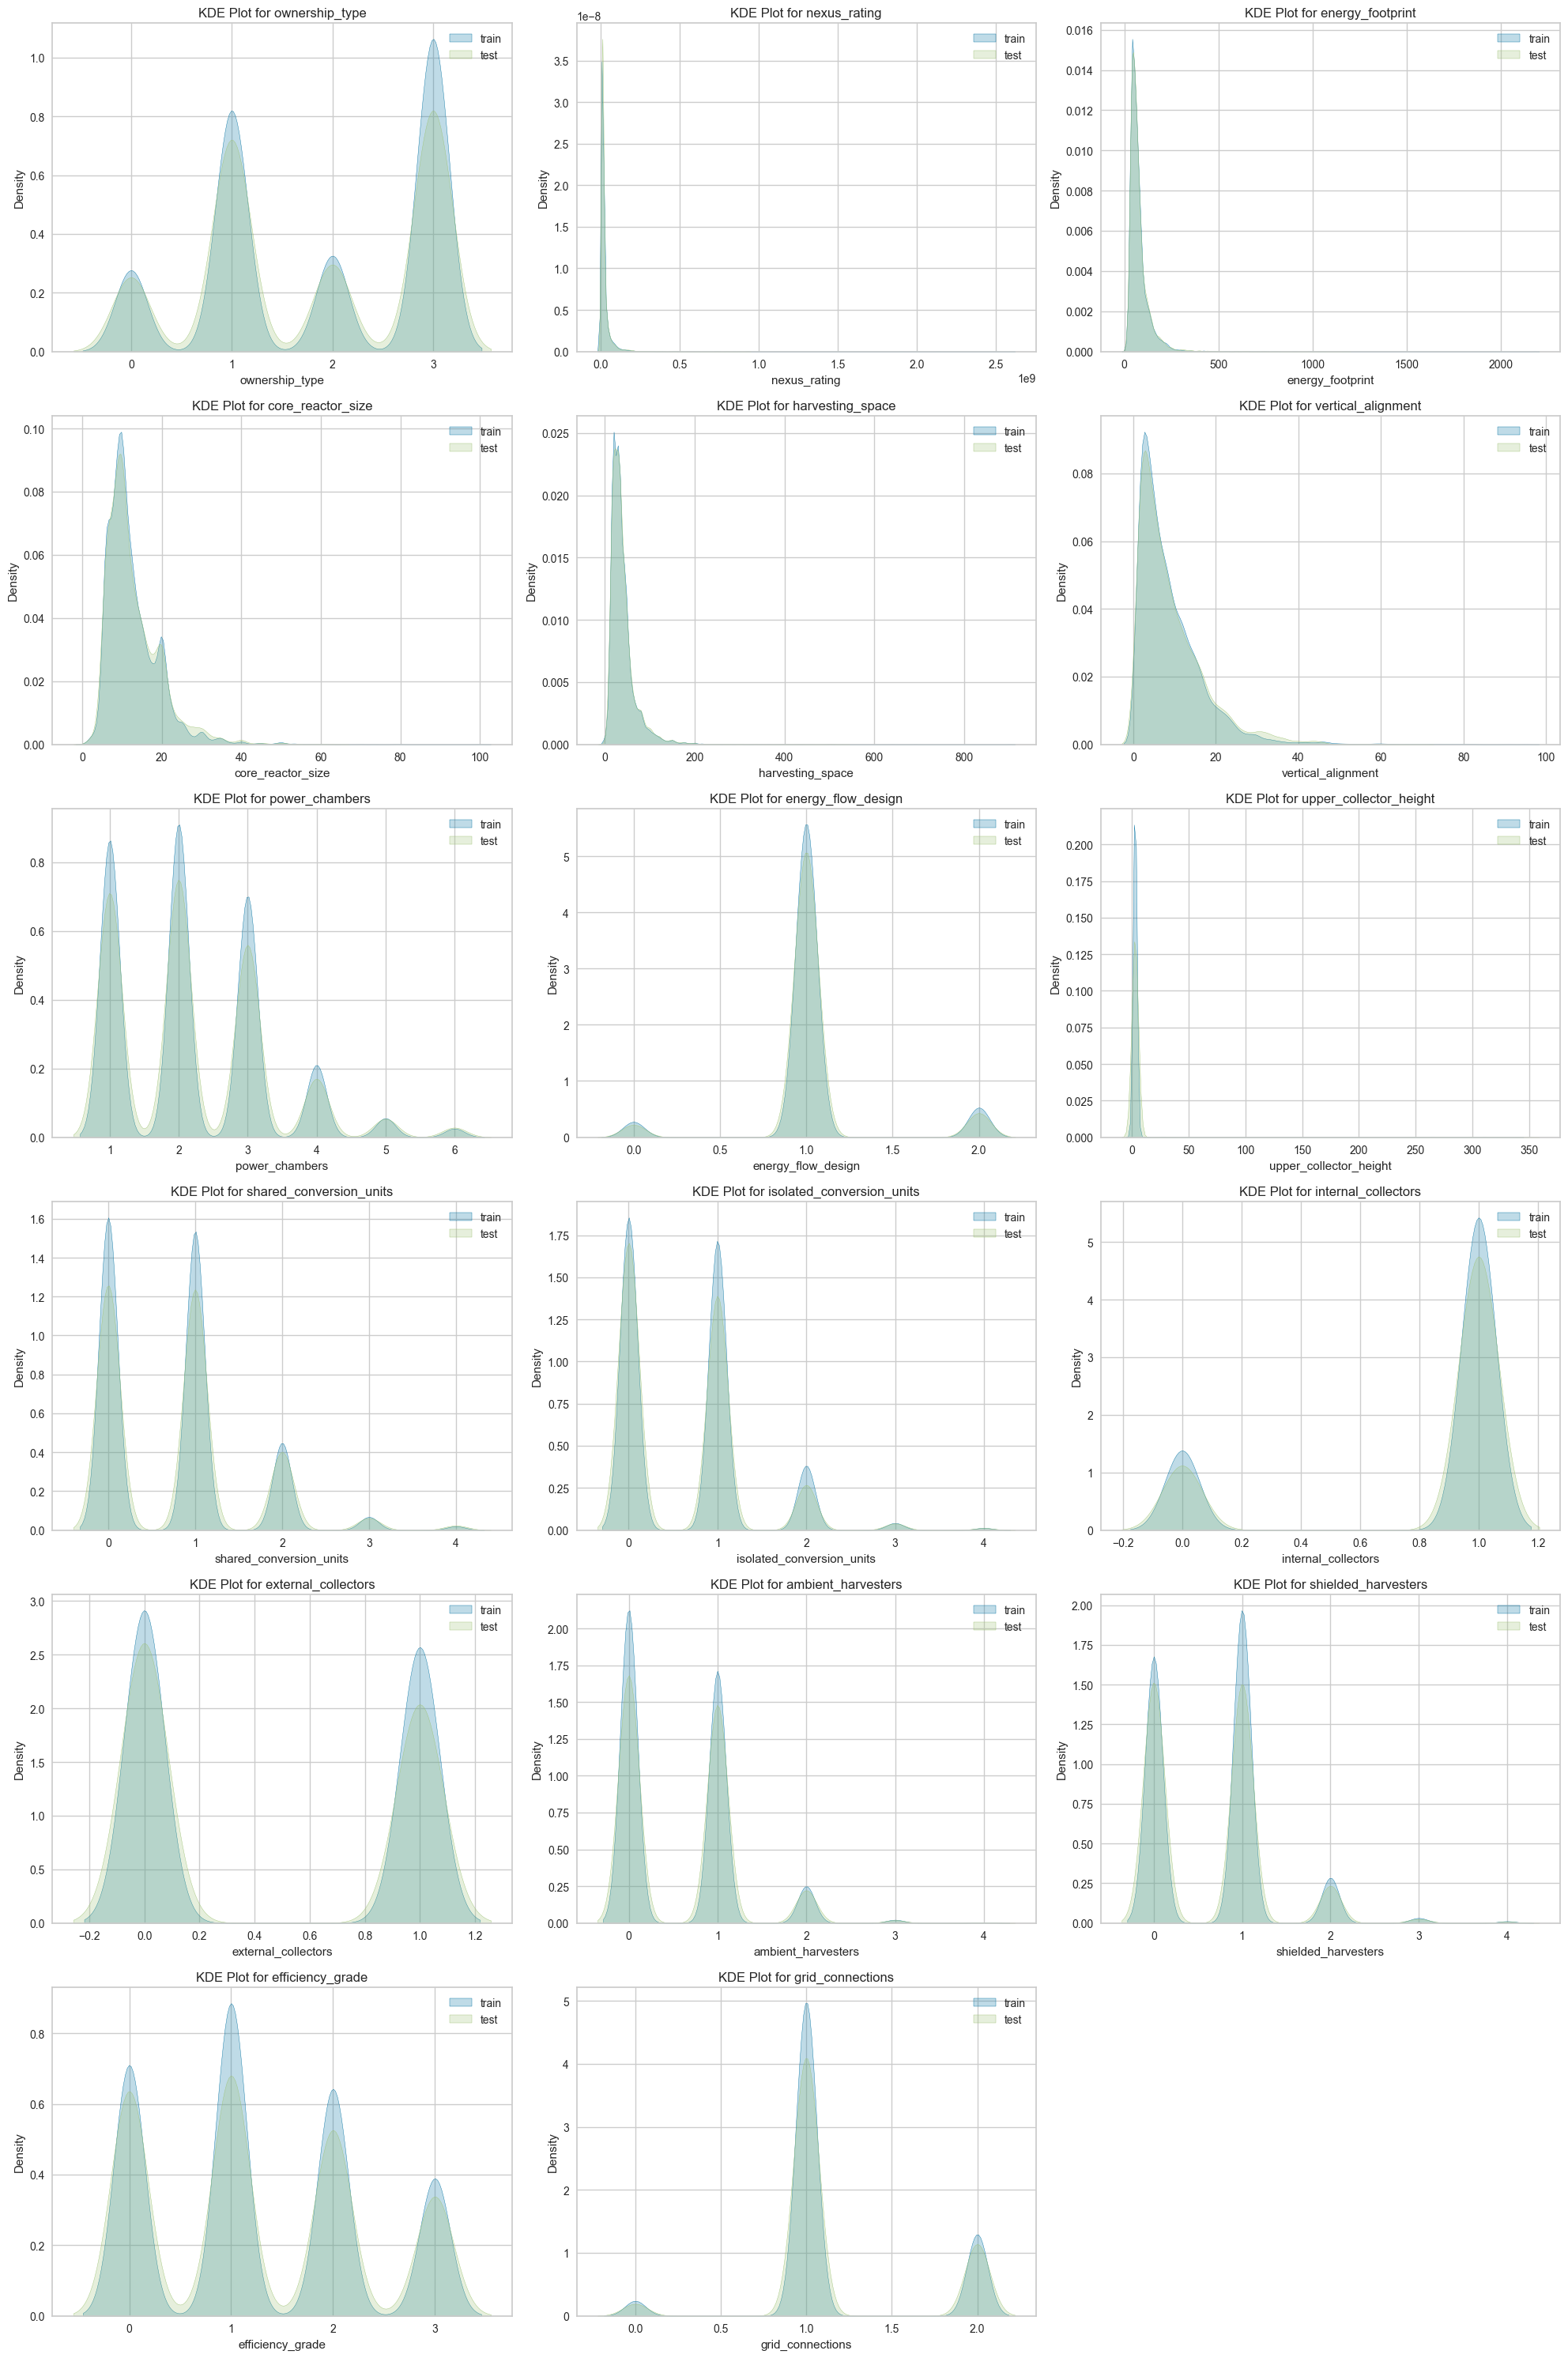

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_columns = len(train.columns)
num_rows = (num_columns + 2) // 3  # Adjust the number of rows based on the number of columns

fig, axes = plt.subplots(num_rows, 3, figsize=(20, num_rows * 5))

for i, column in enumerate(train.columns):
    row = i // 3
    col = i % 3
    sns.kdeplot(train[column], label='train', fill=True, ax=axes[row, col])
    sns.kdeplot(test[column], label='test', fill=True, ax=axes[row, col])
    axes[row, col].set_title(f'KDE Plot for {column}')
    axes[row, col].legend()

# Hide any empty subplots
for j in range(i + 1, num_rows * 3):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


## Using random forest regressor

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rfr = RandomForestRegressor(random_state=42, n_estimators=500, max_depth=20)
rfr.fit(train.drop(columns=['nexus_rating']), np.log1p(train['nexus_rating']))
predict = np.expm1(rfr.predict(test.drop(columns=['nexus_rating'])))

In [121]:
# test['pred'] = predict['nexus_rating']
print('RMSLE: ', rmsle(test['nexus_rating'], predict))
print('Required RMSLE <', 0.294)

RMSLE:  0.3014992374915986
Required RMSLE < 0.294


## Using catboost   

In [131]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_log_error
def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

X_train, X_val, y_train, y_val = train_test_split(train.drop(columns='nexus_rating'), train['nexus_rating'], test_size=0.1)

train_pool = Pool(X_train, y_train)
val_pool = Pool(X_val, y_val)

cat = CatBoostRegressor(iterations=2280, depth=8, l2_leaf_reg=4, bagging_temperature=10, border_count=254, per_float_feature_quantization='1:border_count=1024')

# Tune model on validation data
cat.fit(X_train, np.log1p(y_train))

predict = np.expm1(cat.predict(X_val))
print('RMSLE: ', rmsle(y_val, predict))
print('Required RMSLE <', 0.294)

0:	learn: 0.8458301	total: 21.3ms	remaining: 48.6s
1:	learn: 0.8274239	total: 27.9ms	remaining: 31.8s
2:	learn: 0.8094660	total: 34ms	remaining: 25.8s
3:	learn: 0.7917649	total: 40.1ms	remaining: 22.8s
4:	learn: 0.7745790	total: 45.4ms	remaining: 20.7s
5:	learn: 0.7580050	total: 49.8ms	remaining: 18.9s
6:	learn: 0.7424997	total: 54.6ms	remaining: 17.7s
7:	learn: 0.7270982	total: 59.3ms	remaining: 16.9s
8:	learn: 0.7123840	total: 63.9ms	remaining: 16.1s
9:	learn: 0.6985507	total: 68.5ms	remaining: 15.6s
10:	learn: 0.6845591	total: 73.2ms	remaining: 15.1s
11:	learn: 0.6711144	total: 77.8ms	remaining: 14.7s
12:	learn: 0.6579138	total: 82.4ms	remaining: 14.4s
13:	learn: 0.6459989	total: 87ms	remaining: 14.1s
14:	learn: 0.6335460	total: 91.8ms	remaining: 13.9s
15:	learn: 0.6216377	total: 96.3ms	remaining: 13.6s
16:	learn: 0.6104370	total: 101ms	remaining: 13.4s
17:	learn: 0.5999101	total: 106ms	remaining: 13.3s
18:	learn: 0.5892536	total: 110ms	remaining: 13.1s
19:	learn: 0.5790734	total: 1

In [132]:
from sklearn.metrics import mean_squared_log_error
def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Test model on test data
cat.fit(train.drop(columns='nexus_rating'), np.log1p(train['nexus_rating']))

predict = np.expm1(cat.predict(test.drop(columns='nexus_rating')))
print('RMSLE: ', rmsle(test['nexus_rating'], predict))
print('Required RMSLE <', 0.294)

0:	learn: 0.8453061	total: 14.4ms	remaining: 32.7s
1:	learn: 0.8268711	total: 22.2ms	remaining: 25.3s
2:	learn: 0.8088609	total: 28.6ms	remaining: 21.7s
3:	learn: 0.7911292	total: 34.7ms	remaining: 19.8s
4:	learn: 0.7745129	total: 42.1ms	remaining: 19.1s
5:	learn: 0.7577613	total: 49.2ms	remaining: 18.6s
6:	learn: 0.7418360	total: 55.1ms	remaining: 17.9s
7:	learn: 0.7261886	total: 61.6ms	remaining: 17.5s
8:	learn: 0.7112697	total: 66.7ms	remaining: 16.8s
9:	learn: 0.6974202	total: 71.8ms	remaining: 16.3s
10:	learn: 0.6833829	total: 77.5ms	remaining: 16s
11:	learn: 0.6698974	total: 82.6ms	remaining: 15.6s
12:	learn: 0.6568529	total: 88.1ms	remaining: 15.4s
13:	learn: 0.6450464	total: 94.5ms	remaining: 15.3s
14:	learn: 0.6326344	total: 99.9ms	remaining: 15.1s
15:	learn: 0.6208837	total: 105ms	remaining: 14.9s
16:	learn: 0.6096496	total: 112ms	remaining: 14.9s
17:	learn: 0.5990630	total: 118ms	remaining: 14.9s
18:	learn: 0.5884200	total: 124ms	remaining: 14.8s
19:	learn: 0.5782931	total: 

Text(0.5, 1.0, 'Feature Importance')

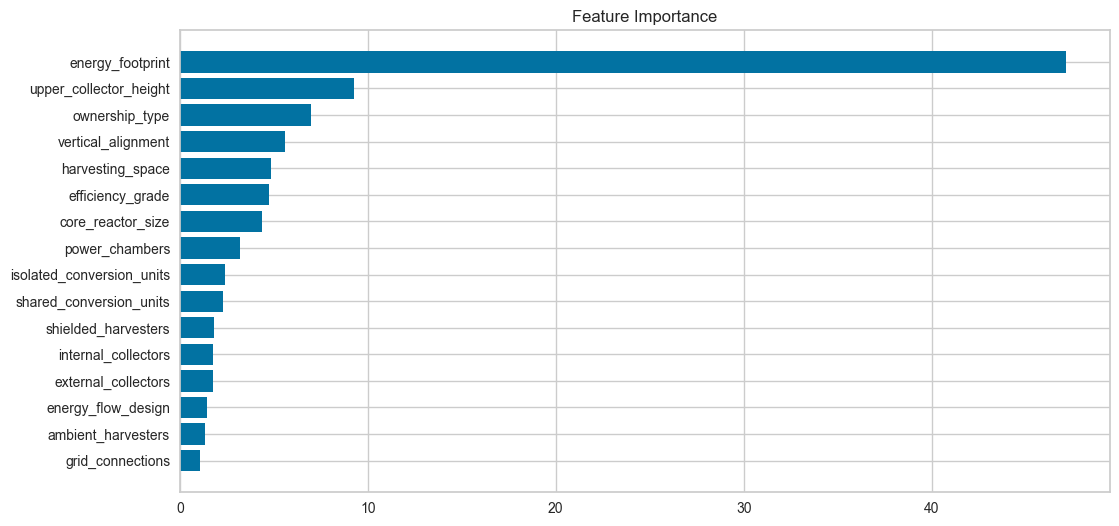

In [130]:
import seaborn as sns
feature_importance = cat.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(test.drop(columns='nexus_rating').columns)[sorted_idx])
plt.title('Feature Importance')

## Using pycaret


In [35]:
import pycaret.regression as pcr

setup = pcr.setup(
    data=train,                      # Your dataset
    target='nexus_rating',           # Target column
    session_id=42,                   # For reproducibility
    # preprocess=True,                 # Enable preprocessing
    # log_experiment=True,             # Enable experiment logging
    # imputation_type="simple",      # iterative imputation for missing values
    # normalize=True,                  # Normalize numerical features
    # normalize_method='robust',       # Use robust normalization method
    # feature_selection=False,         # Enable automatic feature selection
    # remove_multicollinearity=False,  # Remove features with multicollinearity
    # multicollinearity_threshold=0.9, # Set the threshold for multicollinearity
    # #transformation=True,            # Apply transformation to numerical features
    transform_target=True,          # Transform the target variable if needed
    # index=False
)

,Description,Value
0,Session id,42
1,Target,nexus_rating
2,Target type,Regression
3,Original data shape,"(23285, 17)"
4,Transformed data shape,"(23285, 17)"
5,Transformed train set shape,"(16299, 17)"
6,Transformed test set shape,"(6986, 17)"
7,Numeric features,16
8,Rows with missing values,94.5%
9,Preprocess,True


In [113]:
best = pcr.compare_models(sort='RMSLE')
best

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:06:45
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)


KeyboardInterrupt: 

In [30]:
et_model = pcr.create_model('et', loss_function='RMSLE')
tuned_et = pcr.tune_model(et_model, optimize='RMSLE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6816887.7104,592399454708984.8750,24339257.4806,0.6200,0.3081,0.2353
1,9340728.3843,7008131235130090.0000,83714581.9743,0.4318,0.3074,0.2292
2,7017714.0083,1882645271198691.0000,43389460.3700,-0.3745,0.3343,0.2572
3,5940623.3312,250390157596615.7812,15823721.3574,0.7683,0.2940,0.2150
4,6628812.0234,425668641776324.2500,20631738.6998,0.6784,0.3039,0.2308
5,6795449.9518,384228456535794.9375,19601746.2624,0.7716,0.3211,0.2371
6,6633148.6538,493334191126784.4375,22211127.6419,0.6531,0.2947,0.2206
7,6029923.9116,490363931754131.9375,22144162.4758,0.8262,0.2804,0.2075
8,5747813.8069,248280932132164.4062,15756932.8276,0.8048,0.3123,0.2413


2024/09/22 19:32:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8381740.1764,590024225699400.1250,24290414.2760,0.6215,0.3994,0.3120
1,12020736.4988,9327224445592910.0000,96577556.6350,0.2438,0.4029,0.2991
2,7986350.4737,652220337879820.2500,25538604.8538,0.5238,0.4150,0.3146
3,8162921.4470,395324713767893.6875,19882774.2976,0.6342,0.4157,0.3113
4,8017574.4443,526866615180851.1875,22953575.2157,0.6020,0.4030,0.3069
5,9015320.6978,765227581783719.3750,27662747.1843,0.5452,0.4056,0.2988
6,8664641.0346,614827409806085.5000,24795713.5369,0.5676,0.4062,0.3108
7,9346725.8790,1357601082843360.0000,36845638.5865,0.5189,0.4028,0.2895
8,8132230.5490,488570685373843.9375,22103635.1167,0.6160,0.4090,0.3124


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


2024/09/22 19:59:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [36]:
model = pcr.create_model('catboost')
catboost_rmsle = pcr.tune_model(model, optimize = 'RMSLE')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:47:02
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Regressor


ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/site-packages/pycaret/internal/pipeline.py", line 278, in fit
    fitted_estimator = self._memory_fit(
  File "/usr/local/lib/python3.10/site-packages/joblib/memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/site-packages/pycaret/internal/pipeline.py", line 69, in _fit_one
    transformer.fit(*args)
  File "/usr/local/lib/python3.10/site-packages/catboost/core.py", line 5873, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline,
  File "/usr/local/lib/python3.10/site-packages/catboost/core.py", line 2410, in _fit
    self._train(
  File "/usr/local/lib/python3.10/site-packages/catboost/core.py", line 1790, in _train
    self._object._train(train_pool, test_pool, params, allow_clear_pool, init_model._object if init_model else None)
  File "_catboost.pyx", line 5017, in _catboost._CatBoost._train
  File "_catboost.pyx", line 5066, in _catboost._CatBoost._train
_catboost.CatBoostError: catboost/libs/metrics/metric.cpp:6930: All train targets are equal


PicklingError: Could not pickle the task to send it to the workers.

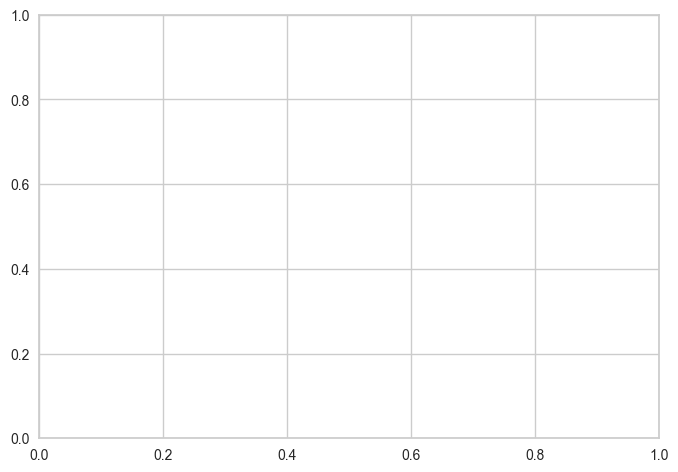

In [23]:
pcr.plot_model(et_model, plot = 'learning')

In [32]:
pcr.predict_model(et_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,7193465.5245,673444983138353.1250,25950818.5447,0.7643,0.3059,0.2296


,ownership_type,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections,nexus_rating,prediction_label
16299,3.0,73.900002,24.700001,15.000000,11.0,1.0,NaN,NaN,1.0,0.0,NaN,NaN,0.0,1.0,NaN,1.0,20555980.0,2.097937e+07
16300,3.0,62.099998,NaN,31.299999,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7941135.0,8.880778e+06
16301,1.0,56.000000,6.000000,41.000000,4.0,3.0,NaN,2.48,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,9900000.0,9.444400e+06
16302,NaN,268.399994,NaN,NaN,6.0,4.0,NaN,3.20,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,133022256.0,2.134294e+08
16303,NaN,90.500000,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,0.0,1.0,32500000.0,3.701506e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23280,0.0,45.000000,5.500000,29.000000,5.0,2.0,1.0,2.64,0.0,1.0,1.0,0.0,1.0,0.0,2.0,2.0,7990000.0,8.419270e+06
23281,3.0,69.699997,19.000000,32.200001,2.0,2.0,NaN,3.50,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,11756299.0,1.226264e+07
23282,NaN,40.000000,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8300000.0,8.300000e+06
23283,3.0,35.400002,NaN,NaN,8.0,1.0,NaN,3.00,1.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0,9133200.0,9.404143e+06


In [33]:
final_et = pcr.finalize_model(et_model)
final_et

2024/09/22 20:04:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['ownership_type',
                                             'energy_footprint',
                                             'core_reactor_size',
                                             'harvesting_space',
                                             'vertical_alignment',
                                             'power_chambers',
                                             'energy_flow_design',
                                             'upper_collector_height',
                                             'shared_conversion_units',
                                             'isolated_conversion_units',
                                             'internal_collectors',
                                             'external_collectors',
                                             'ambient_harvesters',
                                             'shielded_harvesters',
                                             'efficiency_grade',
                                             'grid_connections'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=RobustScaler())),
                ('actual_estimator',
                 ExtraTreesRegressor(n_jobs=-1, random_state=42))])

In [34]:
final_predict = pcr.predict_model(final_et, data=test)
final_predict.to_csv('final_predict.csv')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,7885666.5610,661032584019784.8750,25710553.9423,0.6500,0.3299,0.2719


In [35]:
rmsle_pred = rmsle(y_true=final_predict['nexus_rating'], y_pred=final_predict['prediction_label'])
print('RMSLE: ', rmsle_pred)
print('Required RMSLE<', 0.294)

RMSLE:  0.3298857044228677
Required RMSLE< 0.294


In [107]:
X = train.drop(columns='nexus_rating')
y = train['nexus_rating']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import (
    HistGradientBoostingRegressor, RandomForestRegressor, 
    StackingRegressor
)
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Define a list of regression estimators that can handle NaNs
estimators = [
    ('XGB Regressor', XGBRegressor(random_state=13)),
    ('CatBoost Regressor', CatBoostRegressor(logging_level='Silent', random_state=13)),
    ('Hist Gradient Boosting Regressor', HistGradientBoostingRegressor(random_state=13)),
    # ('Extra Tree Regressor', ExtraTreeRegressor(random_state=13)),
    ('RandomForest Regressor', RandomForestRegressor(random_state=13)),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=13))
]

# Define the final estimator for the stacking regressor
final_estimator = XGBRegressor(random_state=13)

# Stacking Regressor
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=final_estimator, cv=5, n_jobs=-1)

# Scaling pipeline (imputation is not needed since models can handle NaN)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale features for better performance
])

# Assuming all features are numeric in this example
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X_train.columns)
    ]
)

# Complete pipeline with preprocessing and stacking regressor
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacking_regressor', stacking_regressor)
])

# Fit the model
model_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_pipeline.predict(X_val)

# Print metrics
print(f"\nStacking Regressor training R^2: {model_pipeline.score(X_train, y_train):0.2f}")
print(f"Stacking Regressor test R^2: {model_pipeline.score(X_val, y_test):0.2f}")
print(f"Stacking Regressor RMSE: {mean_squared_error(y_val, y_pred, squared=False):0.2f}")



Stacking Regressor training R^2: 0.72
Stacking Regressor test R^2: 0.45
Stacking Regressor RMSE: 49420806.40


In [109]:
# Predict and evaluate
y_pred = model_pipeline.predict(X_val)

# Print metrics
print(f"\nStacking Regressor training R^2: {model_pipeline.score(X_train, y_train):0.2f}")
print(f"Stacking Regressor test R^2: {model_pipeline.score(X_val, y_val):0.2f}")
print(f"Stacking Regressor RMSE: {mean_squared_error(y_val, y_pred, squared=True):0.2f}")
print('RMSLE: ', rmsle(y_pred, y_val))
print('Required RMSLE: ', 0.294)


Stacking Regressor training R^2: 0.72
Stacking Regressor test R^2: 0.45
Stacking Regressor RMSE: 2442416105282475.00
RMSLE:  0.3134931421081633
Required RMSLE:  0.294


In [111]:
y_pred = model_pipeline.predict(test.drop(columns='nexus_rating'))
print('RMSLE: ', rmsle(y_pred, test['nexus_rating']))
print('Required RMSLE: ', 0.294)

RMSLE:  0.32877769129746404
Required RMSLE:  0.294
